# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Вероятность. 


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds22_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 35 баллов за контест и 5 баллов за ноутбук
* Задача 2 &mdash; 20 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 40 баллов

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')
%matplotlib inline

### <font color="blue"><i>Легкая часть</i></font>


### Задача 1.

Условие задачи в контесте, ссылка на который отправлена через бот.

Продублируйте сюда написанный код и постройте требуемые графики.

Начнем с генерации равномерного распределения из бернулевского. Заполним матрицу сооствестующего размера 0 и 1. Домножив на матрицу степеней двойки получим желаемый результат.

In [4]:
def uniform(size=1, precision=30):
    if (type(size) == type(())):
        my_size = (*size, precision)
    else:
        my_size = (size, precision)
    ans = coin(size=my_size)
    to_multiply = 2.0**np.arange(-precision, 0)
    return ans @ to_multiply.T

Визуализируем полученное распределение.

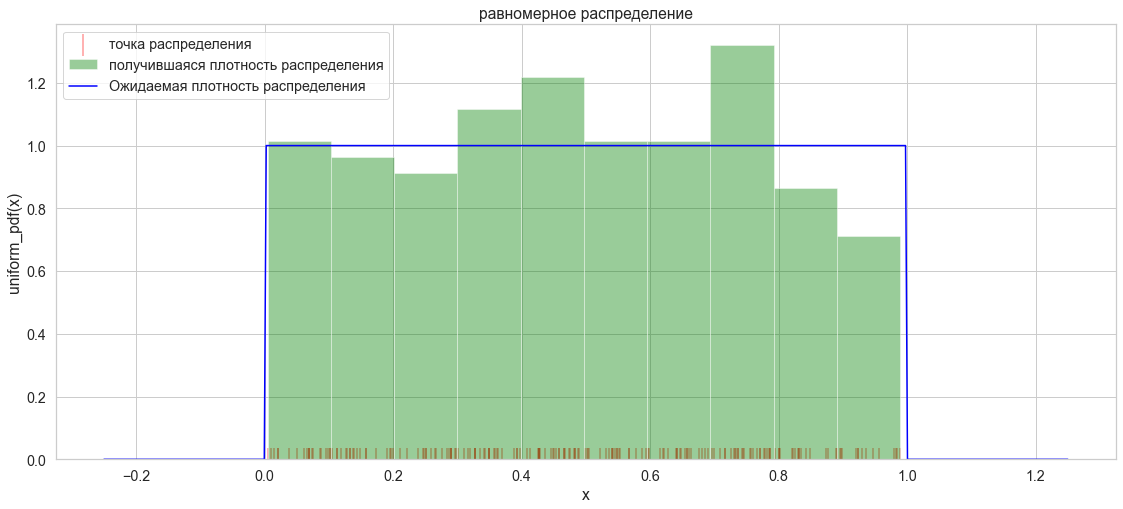

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [22]:
def plot_uniform_density(size=200):
        csi = uniform(size=size)
        fig1, ax1 = plt.subplots(figsize=(19, 8))
        ax1.scatter(x=csi, y=np.zeros(size), alpha=0.4, s = 500, color='red', marker = "|", label='точка распределения')
        ax1.hist(x=csi, density=True, bins=10 ,alpha=0.4, color = 'green', label='получившаяся плотность распределения')
        # Я выбрал этот цвет чтобы на его фоне не потерять информацию о плотности точек
        ax1.plot(np.linspace(-0.25, 1.25, 500), uniform_pdf(np.linspace(-0.25, 1.25, 500)), color="blue", label="Ожидаемая плотность распределения")
        ax1.set_title('равномерное распределение')
        ax1.legend(loc="upper left")
        ax1.set_xlabel('x')
        ax1.set_ylabel("uniform_pdf(x)")
        plt.show()
        return plt.gcf()
plot_uniform_density()

Не смотря на некоторое количество выбросов, пцть временами и вполне значительных, наш результат близок к равномерному.

Исследуем качество, получаемой случайной велечины, от точности.

Построим графики с распределениями точек для нескольких точностей

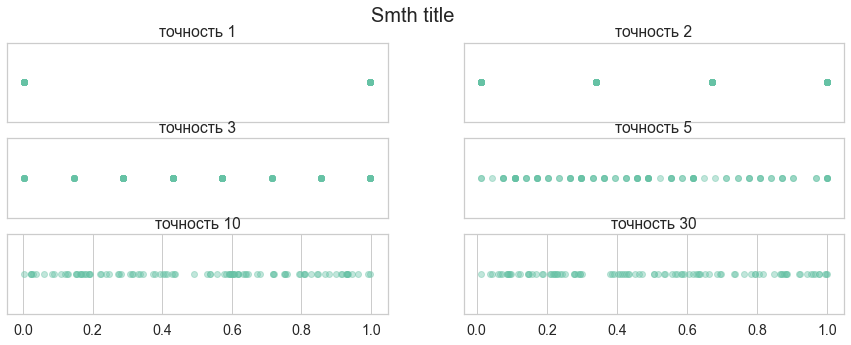

In [30]:
def plot_uniform_different_precision(size=100):
    # определите график размера 15 на 3
    plt.figure(figsize=(15,5))
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.suptitle("Smth title", size = 20)
        plt.scatter(uniform(size, precision), np.zeros(size), alpha=0.4)
        plt.yticks([])
        plt.title("точность " + str(precision))
        if i < 4:
            plt.xticks([])
    plt.show()
plot_uniform_different_precision()

Все точности меньше 5 не годяться так как там можно глазом увидеть бины. В точности 5 тоже однако там они распределены достаточно равномерно. Точность 10 и 30 на вид не отличаються, по крайней мере на таком масштабе.

Создадим гениратор случайных велечин с нормальным распределением. Для этого воспользуемся методом Бокса-Мюллера.

In [32]:
def normal(size=1, loc=0, scale=1, precision=30):
    phi = uniform(size, precision)
    r = uniform(size, precision)
    return loc + scale * np.sin(2*np.pi*phi)*np.sqrt(-2*np.log(r))

Визуализируем получившееся распределение.

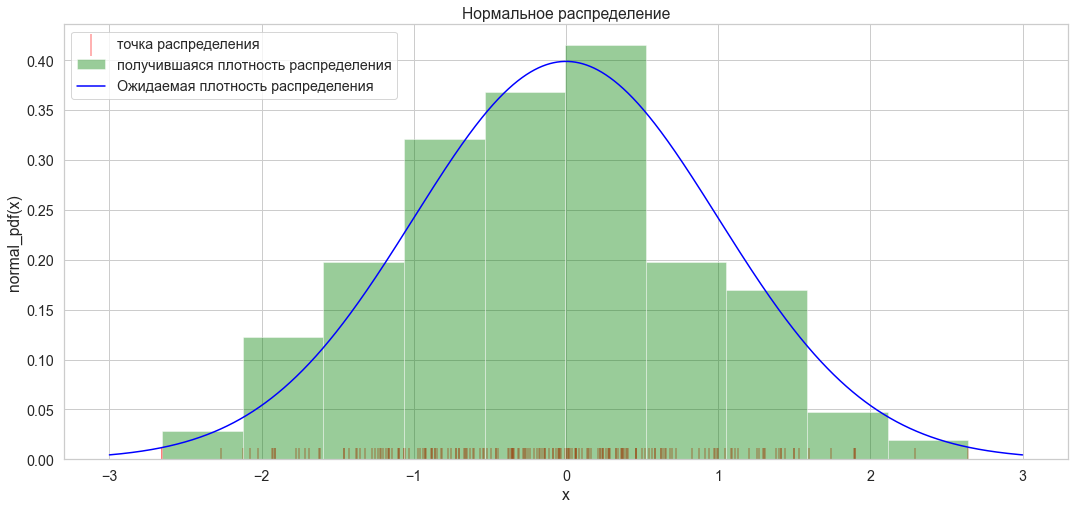

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [40]:
def plot_normal_density(size=200):
        csi = normal(size=size)
        fig2, ax2 = plt.subplots(figsize=(18, 8))
        ax2.scatter(x=csi, y=np.zeros(size), alpha=0.4, s = 500, color='red', marker = "|", label='точка распределения')
        ax2.hist(x=csi, density=True, bins=10 ,alpha=0.4, color = 'green', label='получившаяся плотность распределения')
        # Я выбрал этот цвет чтобы на его фоне не потерять информацию о плотности точек
        ax2.plot(np.linspace(-3, 3, 5000), norm_pdf(np.linspace(-3, 3, 5000)), color="blue", label="Ожидаемая плотность распределения")
        ax2.set_title('Нормальное распределение')
        ax2.legend(loc="upper left")
        ax2.set_xlabel('x')
        ax2.set_ylabel("normal_pdf(x)")
        plt.show()
        return plt.gcf()
plot_normal_density()

Гистограмма очень похожа на нормальное распредедление

Теперь постораемся создать генератор экспонинциального распределения. Как известно $CDF(\xi) = U[0,1]\Rightarrow 1 - e^{-\lambda \xi} = y$. Где $y$ имеет равномерное распределение, а $\xi \thicksim exp(\lambda)$. Тогда $\xi = -\frac{1}{\lambda}\cdot ln(1 - y)$. Напишем генератор.

In [35]:
def expon(size=1, lambd=1, precision=30):
    return (-1/lambd) * np.log(1 - uniform(size, precision))

Визуализируем получпенное распределение.

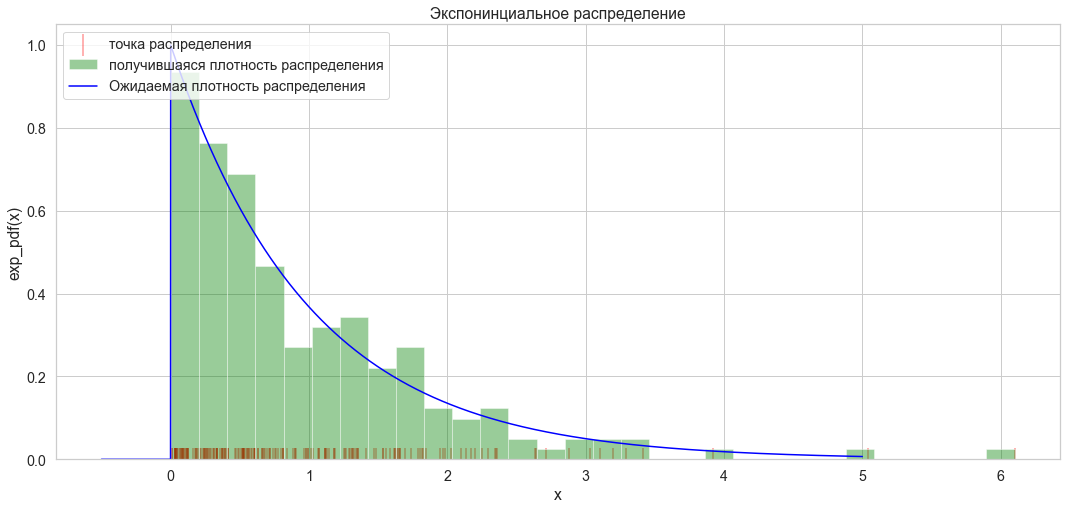

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [42]:
def plot_normal_density(size=200):
        csi = expon(size=size)
        fig3, ax3 = plt.subplots(figsize=(18, 8))
        ax3.scatter(x=csi, y=np.zeros(size), alpha=0.4, s = 500, color='red', marker = "|", label='точка распределения')
        ax3.hist(x=csi, density=True, bins=30 ,alpha=0.4, color = 'green', label='получившаяся плотность распределения')
        # Я выбрал этот цвет чтобы на его фоне не потерять информацию о плотности точек
        ax3.plot(np.linspace(-0.5, 5, 5000), expon_pdf(np.linspace(-0.5, 5, 5000)), color="blue", label="Ожидаемая плотность распределения")
        ax3.set_title('Экспонинциальное распределение')
        ax3.legend(loc="upper left")
        ax3.set_xlabel('x')
        ax3.set_ylabel("exp_pdf(x)")
        plt.show()
        return plt.gcf()
plot_normal_density()

Вполне не плохое приближение. Хотя хуже чем нормальное.

**Выводы:**

При генерации случайных велечин точность равномерного надо брать хотя бы 10. Мы достаточно хорошо сгенерировали номральное и убедились в работоспособности Бокса-Мюлера. Чуть хуже получилось с экспонинциальным и равномерным распределениями.

---

### Задача 2.

Рассмотрим распределение Коши с плотностью
$$p(x) = \frac{1}{\pi(1+x^2)}$$
для $x\in\mathbb{R}$, которое известно своими тяжелыми хвостами. Иначе говоря, плотность убывает медленно при $x \to \infty$. Сравните, например, с нормальным или экспоненциальным распределениями. В частности, из-за этого у распределения Коши даже не существует математического ожидания.

За распределение Коши отвечает класс <a target="_black" href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.cauchy.html">`scipy.stats.cauchy`</a>.

**1.** Визуализируйте на одном графики плотности нормального распределения и распределения Коши. Что можно сказать?

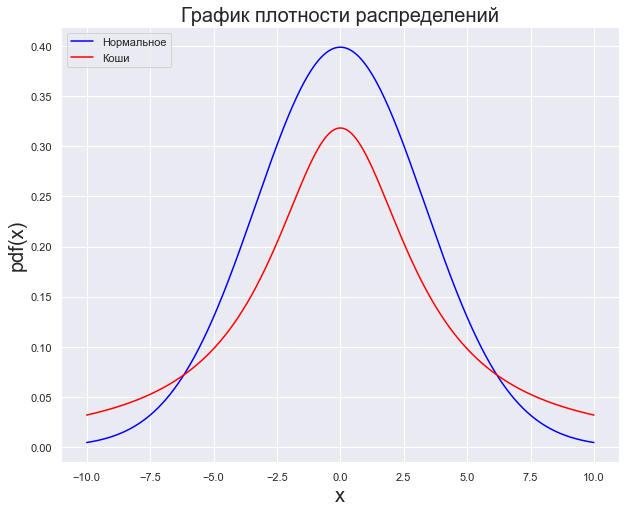

In [79]:
sns.set(style="darkgrid")
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.plot(np.linspace(-10, 10, 5000), norm_pdf(np.linspace(-3, 3, 5000)), color="blue", label="Нормальное")
ax2.plot(np.linspace(-10, 10, 5000), sps.cauchy.pdf(np.linspace(-3, 3, 5000)), color="red", label="Коши")
ax2.set_title('График плотности распределений', size=20)
ax2.legend(loc="upper left")
ax2.set_xlabel('x', size=20)
ax2.set_ylabel("pdf(x)", size=20)
plt.show()
#sns.set(style="whitegrid")

Можно заметить что, несмотря на то что изначально коши был меньше нормального, нормальное быстрее стремиться к нулю чем Коши. Вывод концы и в правду тяжелые.

**2.** Повторите эксперимент с <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">занятия</a> про закон больших чисел для распределения Коши. Выполняется ли закон? 

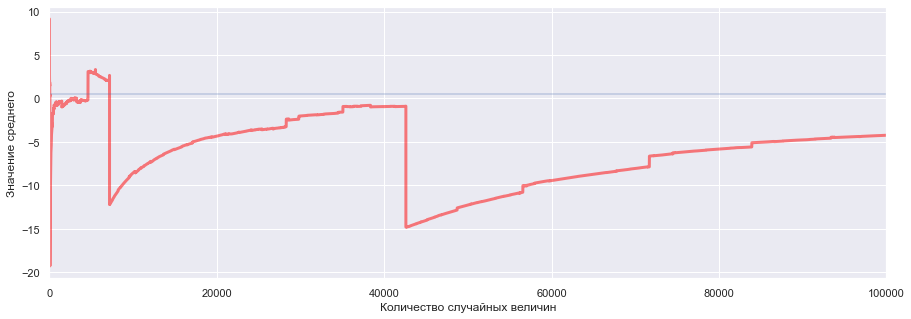

In [82]:
size = 100000  # количество случайных величин
samples = sps.cauchy.rvs(size=size)
cum_means = samples.cumsum() / (np.arange(size) + 1)
plt.figure(figsize=(15, 5))
plt.plot(cum_means, lw=3, color='red', alpha=0.5)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение среднего')
plt.xlim((0, size));

Я запусткал несколько раз. И на одних графиках стремление к нулю было очень хорошим. На других же, например как на этом стремления к нулю нет. В силу того что условие ЗБЧ на Коши не выполнены совсем не обязательно что там должно выполняться его заключение. Так как ЗБЧ не выполнено хотя бы на этом примере проводить эксперемент несколько раз особого смысла нет.

**3.** Аналогичным образом проведите эксперимент по изучению зависимости *выборочной* медианы от размера выборки. Медиану по выборке можно посчитать с помощью <a target="_blank" href="https://numpy.org/doc/stable/reference/generated/numpy.median.html">`np.median`</a>.

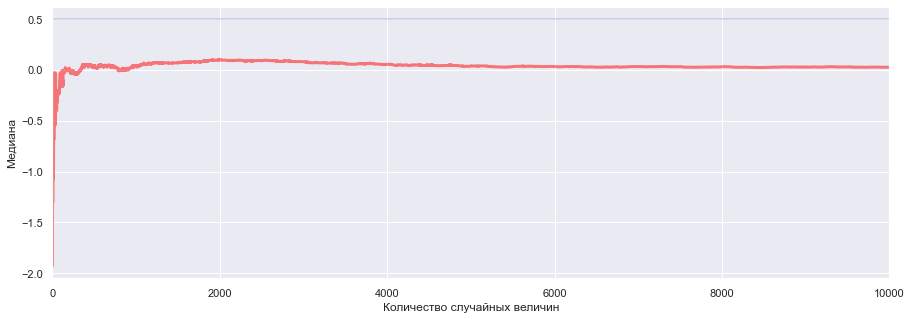

In [84]:
size = 10000  # количество случайных величин
samples = sps.cauchy.rvs(size=size)
cum_median = [np.median(samples[:i+1]) for i in range(size-1)] # Скопировано со StecOwerflow
plt.figure(figsize=(15, 5))
plt.plot(cum_median, lw=3, color='red', alpha=0.5)
plt.hlines(0.5, 0, size, alpha=0.3)
plt.xlabel('Количество случайных величин')
plt.ylabel('Медиана')
plt.xlim((0, size));

Сколько бы раз я не запускал все равно медиана стремиться к нулю. С точки зрения теории вероятностей мне это сложно объяснить. На мой взгляд там должны быть всплески их нет это странно, ну ладно. Подтвердим что это действительно работает множественными экспериментами.

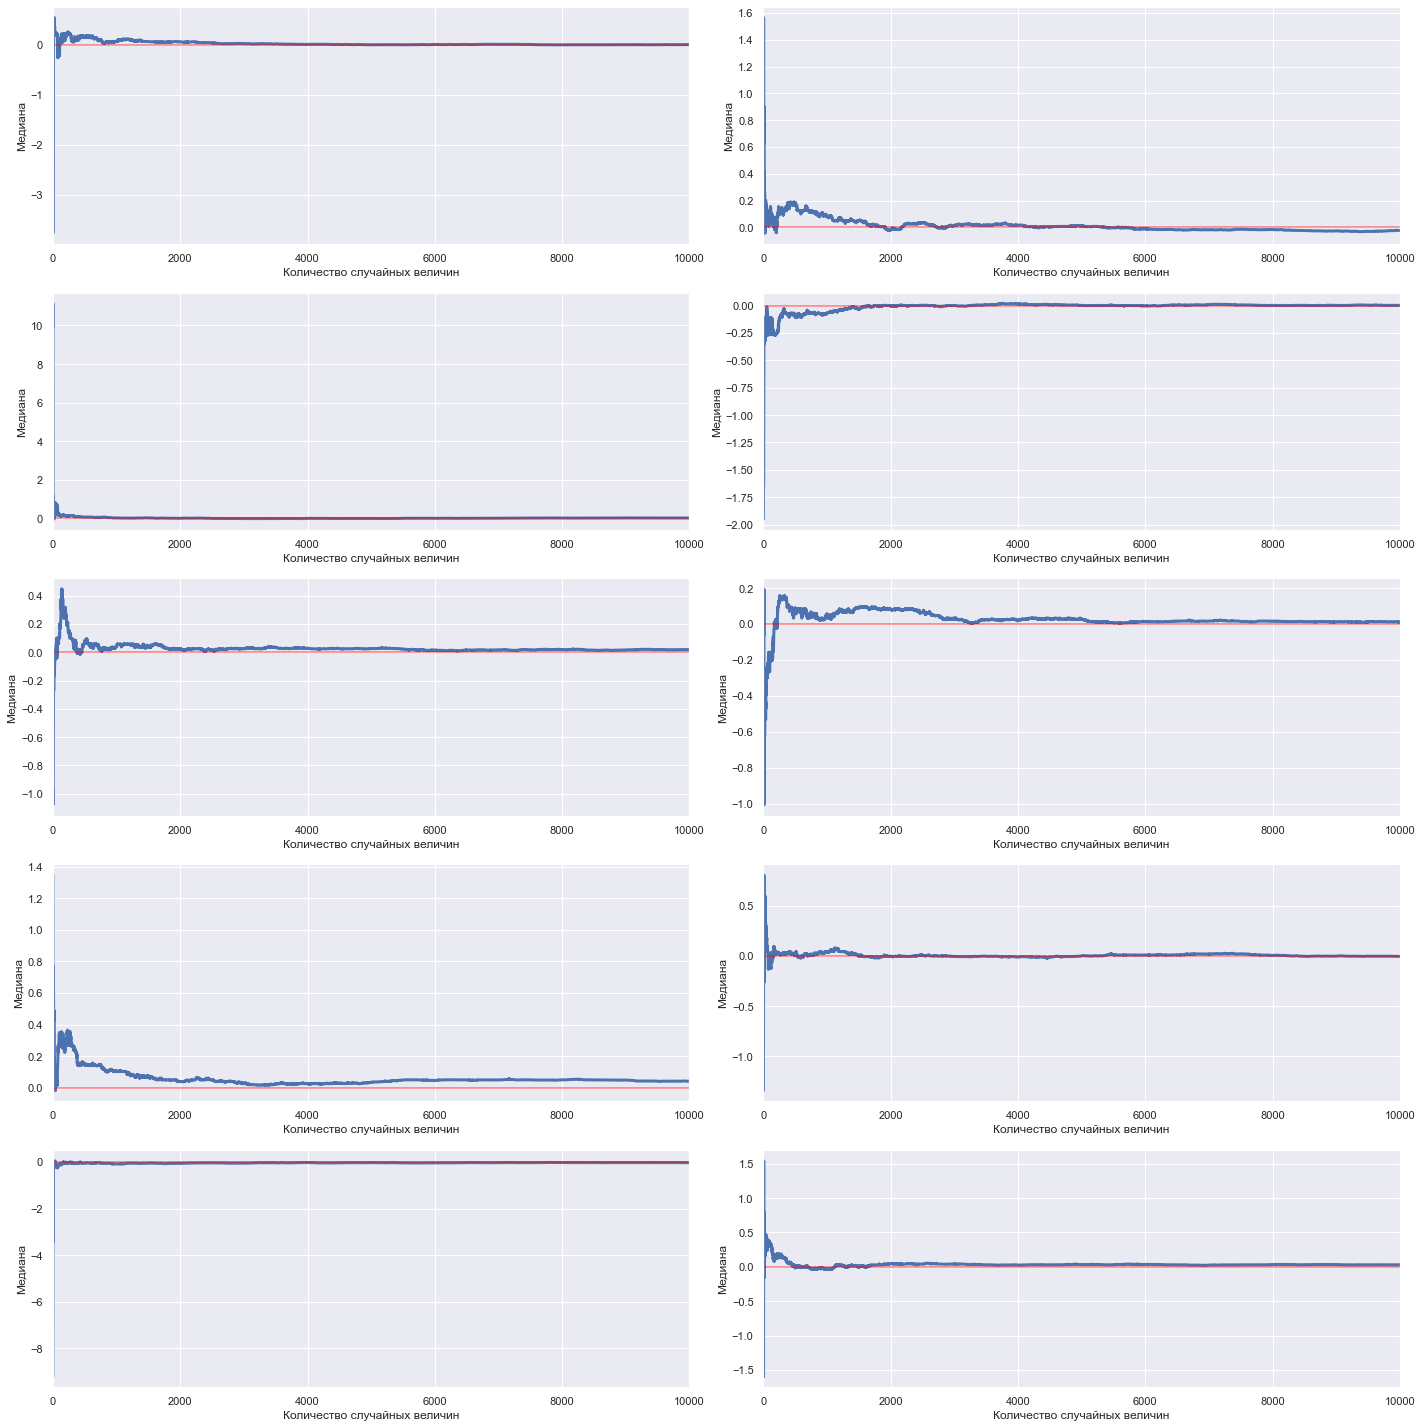

In [89]:
plt.figure(figsize=(20, 20))

# эксперименты
for i in range(10):

    # Генерация выборки и вычисление средних
    samples = sps.cauchy.rvs(size=size)
    cum_median = [np.median(samples[:i+1]) for i in range(size-1)]
    
    # График
    plt.subplot(5, 2, i+1)
    plt.plot(cum_median, lw=3)
    plt.hlines(0, 0, size, alpha=0.5, color="red")
    plt.xlabel('Количество случайных величин')
    plt.ylabel('Медиана')
    plt.xlim((-5, size))
    
plt.tight_layout()

Предположение подтвердилось. Действительно комулятивная медиана сходиться к нулю.

**Вывод:**

ЗБЧ для распределения Коши выполняеться не всегда ,что логично. Был обнаружен странный эффект стремления медианы к нулю. После поиска информации выяснилось ,что этот эффект называеться состоятельностью выборочной медианы и изучаеться статистиками.

### <font color="orange"><i>Сложная часть</i></font>

### Задача 3.

Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/lec4_LLN.html">ноутбук</a> с лекции про закон больших чисел.

На практике не редко возникает вопрос &mdash; **сколько времени потребуется на сбор данных, чтобы оценить среднее с достаточной точностью**. Для ответа на этот вопрос можно использовать различные теоретические оценки, в частности, неравенство Чебышева.

Другой способ &mdash; смоделировать большое количество выборок.
Возьмем в качестве меры отклонения от среднего *среднее значение модуля отклонения от среднего*, то есть
$$F(n) = \frac{1}{K}\sum\limits_{j=1}^{K} \left| S_{nj} - a \right|,$$
где $a$ &mdash; математическое ожидание элемента выборки, $S_{nj}$ &mdash; *выборочное* среднее $n$ элементов в $j$-й выборке, а $K$ &mdash; общее количество выборок.

**1.** Рассмотрим распределения $Bern(a)$ для $a=0.5$. Пусть для нас допустимо отклонение на 0.02, иначе говоря при *истинном* среднем 0.5 мы считаем достаточно точными значения *выборочного* среднего от 0.48 до 0.52. Тогда в качестве *приближения* необходимого размера выборок можно взять наименьшее значение $n$, при котором $F(n) \leqslant 0.02$.

Реализуйте данный эксперимен для $K=500$  и найдите значение $n$. Визуализируйте зависимость $F(n)$ от $n$ в обычном и логарифмическом масштабах.

Для реализации без циклов стоит генерировать достаточно большие выборки и использовать функцию `np.where`.

In [85]:
def generate_fn(n=1000, a = 0.5, K=500):
    p = a
    arr = sps.bernoulli(p=p).rvs((K, n))
    cum_mean = arr.cumsum(axis=1)/(np.ones((K, n)) * (np.arange(n) + 1))
    disp = np.sum(np.abs(cum_mean - a), axis=0)/K
    return disp
n = 10000
disp = generate_fn(n=n)
sdvig = 10

Визуализируем $F(n)$ в обычном масштабе.

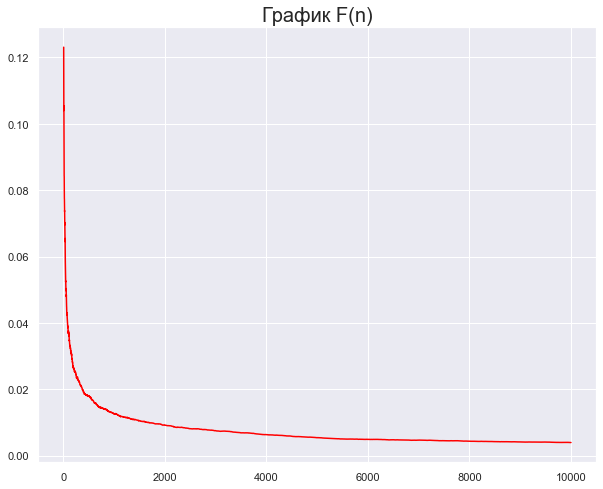

In [86]:
sns.set(style="darkgrid")
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.plot(np.linspace(sdvig, n , n - sdvig), disp[sdvig:], color="red")
ax2.set_title('График F(n)', size=20)
plt.show()

И в логарифмическом

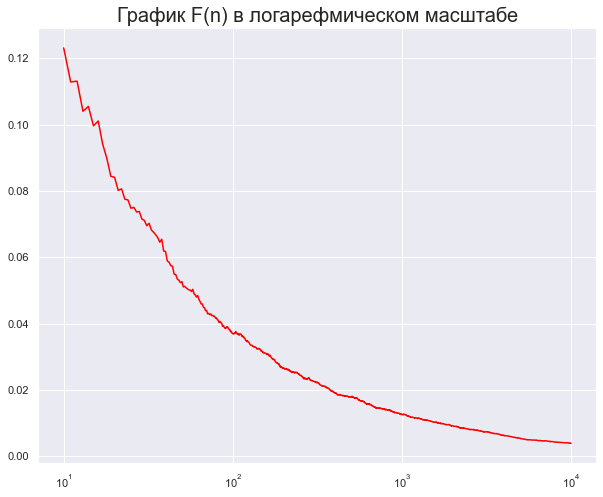

In [87]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.plot(np.linspace(sdvig, n , n - sdvig), disp[sdvig:], color="red")
ax2.set_title('График F(n) в логарефмическом масштабе', size=20)
plt.xscale('log')
plt.show()

На промежутке 10 - 100  хорошо апроксимируеться прямой $F(\ln{n}) = 0.2 - 0.08\ln{n}$. Значит $F(n) = x^{-0.08}\cdot C$. Это просто интересный факт который нам ни где не пригодиться, но вроде это все что мы могли вытащить из логарифмического масштаба.

Найдем теперь минимальное n начиная с которого выполняеться $F(n) < 0.02$

In [88]:
search_nomber = n - np.where(disp < 0.02)[0].size
print(search_nomber)

376


**2.** Повторите данный эксперимент для значений $a$ от 0.05 до 0.95 с шагом 0.05. Визуализируйте зависимость необходимого размера выборки $n$ от значения $a$.

При реализации можно сделать цикл по значениям $a$.

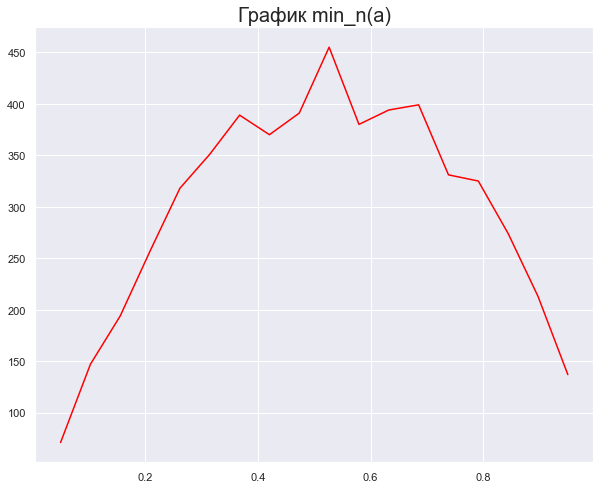

In [89]:
ans = list()
for a in range(5, 95, 5):
    ans.append(n - np.where(generate_fn(n=n, a=a/100) < 0.02)[0].size)
sns.set(style="darkgrid")
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.plot(np.linspace(0.05, 0.95, 18), ans, color="red")
ax2.set_title('График min_n(a)', size=20)
plt.show()

Нельзя судить по одному графику о процессе нарисуем их 100 штук

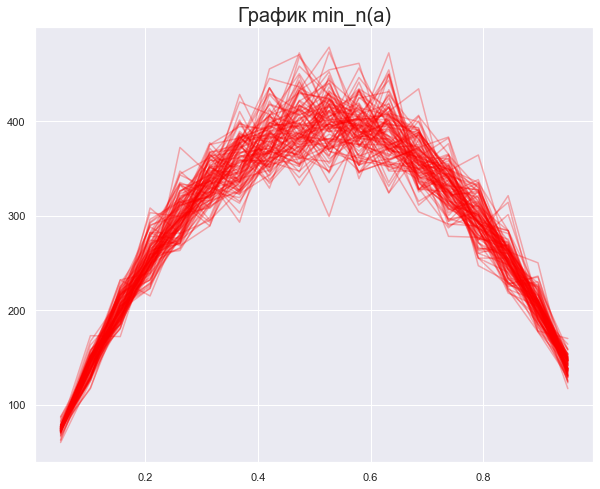

In [95]:
sns.set(style="darkgrid")
fig2, ax2 = plt.subplots(figsize=(10, 8))
ax2.set_title('График min_n(a)', size=20)
for i in range(100):
    ans = list()
    for a in range(5, 95, 5):
        ans.append(n - np.where(generate_fn(n=n, a=a/100) < 0.02)[0].size)
    ax2.plot(np.linspace(0.05, 0.95, 18), ans, color="red", alpha=0.3)
plt.show()

Мы получили симметричную, относительно 0.5 фигуру. Это ожидаемо так как само распределение имеет такую-же симметрию. Если процесс детерменированный или близок к этому то измерений нужно проводить намного меньше равновероятного случая.

**Выводы:**

Для определения среднего случайной велечины необходимо провести около 500 случайных секрий.